In [40]:
import pandas as pd 
import folium
import matplotlib.pyplot as plt

In [2]:
# save file path to variable
stations = "Data/Divvy_Stations_2017_Q3Q4.csv"

# read with pandas
stations = pd.read_csv(stations)
stations.tail()

,id,name,city,latitude,longitude,dpcapacity,online_date,Unnamed: 7
580,622,California Ave & Cortez St,Chicago,41.900363,-87.696704,15,4/27/2017 9:17,NaN
581,623,Michigan Ave & 8th St,Chicago,41.872773,-87.623981,31,6/13/2017 15:23,NaN
582,624,Dearborn St & Van Buren St (*),Chicago,41.876268,-87.629155,16,7/26/2017 21:25,NaN
583,625,Chicago Ave & Dempster St,Evanston,42.041691,-87.680687,15,8/11/2017 16:53,NaN
584,626,Delano Ct & Roosevelt Rd,Chicago,41.867491,-87.632190,19,12/21/2017 22:06,NaN


In [3]:
# read with pandas
q_one = pd.read_csv("Data/Divvy_Trips_2017_Q1.csv")
q_two = pd.read_csv("Data/Divvy_Trips_2017_Q2.csv")
q_three = pd.read_csv("Data/Divvy_Trips_2017_Q3.csv")
q_four = pd.read_csv("Data/Divvy_Trips_2017_Q4.csv")
divvy_data_2017 = pd.concat([q_one,q_two, q_three, q_four])
divvy_data_2017.tail()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
669234,16734070,10/1/2017 0:01,10/1/2017 0:15,1099,837,289,Wells St & Concord Ln,226,Racine Ave & Belmont Ave,Subscriber,Male,1991.0
669235,16734069,10/1/2017 0:00,10/1/2017 0:07,3688,366,45,Michigan Ave & Congress Pkwy,52,Michigan Ave & Lake St,Customer,NaN,NaN
669236,16734068,10/1/2017 0:00,10/1/2017 0:05,1416,264,520,Greenview Ave & Jarvis Ave,447,Glenwood Ave & Morse Ave,Customer,NaN,NaN
669237,16734067,10/1/2017 0:00,10/1/2017 0:06,5396,361,288,Larrabee St & Armitage Ave,289,Wells St & Concord Ln,Subscriber,Female,1984.0
669238,16734066,10/1/2017 0:00,10/1/2017 0:12,5802,741,135,Halsted St & 21st St,129,Blue Island Ave & 18th St,Subscriber,Female,1994.0


In [33]:
divvy_data_2017["start_time"] = pd.to_datetime(divvy_data_2017["start_time"])
divvy_data_2017["end_time"] = pd.to_datetime(divvy_data_2017["end_time"])
divvy_data_2017["month"] = divvy_data_2017["start_time"].map(lambda x: x.month)
divvy_data_2017.head()
type(divvy_data_2017)

pandas.core.frame.DataFrame

In [75]:
monthly_rides = divvy_data_2017["month"].value_counts()
monthly_rides = monthly_rides.sort_index()
# monthly_rides = monthly_rides.apply('{:,}'.format)

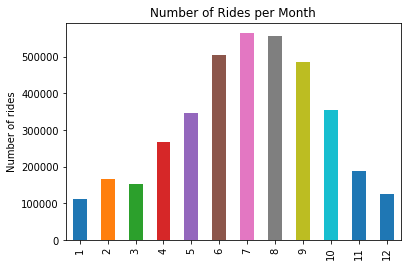

In [78]:
monthly_rides.plot.bar()
plt.title("Number of Rides per Month")
plt.ylabel("Number of rides")
plt.savefig("outputs/bargraph.png")

In [5]:
divvy_data_2017.to_csv("outputs/divvy_data_2017.csv")

In [ ]:
def divvy_by_bike (bikeId):
    selectedbike = 

In [267]:
def divvy_data_by_month (month): 
    
    #select one month of the year
    month_subset = divvy_data_2017[divvy_data_2017["month"]==month]
    
    #count departures from each origin
    dep_counts =  month_subset.groupby("from_station_id").count().iloc[:,[0]]
    dep_counts=dep_counts.reset_index()
    dep_counts=dep_counts.rename(columns ={"trip_id":"Dep Counts","from_station_id":"id"})
    global merge_df
    merge_df = dep_counts.merge(stations,on="id")
    
    # count trips for each origin
    arrival_counts =  month_subset.groupby("to_station_id").count().iloc[:,[0]]
    arrival_counts=arrival_counts.reset_index().rename(columns = {"trip_id":"Arrival Counts","to_station_id":"id"})
    merge_df = merge_df.merge(arrival_counts, on="id")
    merge_df=merge_df.drop(columns=["Unnamed: 7"])
    return merge_df

def plot_data (merge_df):
    chicago_map = folium.Map(location = [41.883132,-87.637321], tiles = "Stamen toner")
    
    for index, row in merge_df.iterrows():
        change = abs(row['Dep Counts'] - row['Arrival Counts'])
        circle_size = change/50
        folium.CircleMarker(location = (row['latitude'],row['longitude']),
                  radius =circle_size, color="red", popup=row["name"]).add_to(chicago_map)
#     return chicago_map
    chicago_map.save("outputs/net_changes.html")
        
        

In [271]:
month = input('what month do you want to look at (1-12)')
x = int(month)
divvy_data_by_month(x)
plot_data(merge_df)

what month do you want to look at (1-12)5
